In [1]:
import numpy as np
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt


Ingrese el número de piezas: 4


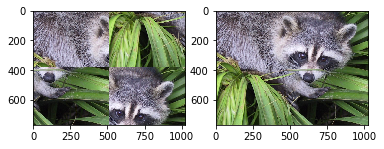

Seleccione una pieza [1 - 4]: 4
Seleccione el tipo de movimiento:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 1


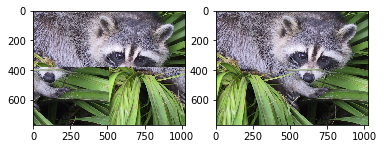

Seleccione una pieza [1 - 4]: 3
Seleccione el tipo de movimiento:
1. Arriba
2. Abajo
3. Izquierda
4. Derecha
Seleccione una opción: 4
******GANASTE***********


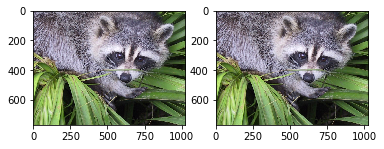

In [2]:
objetivo = misc.face()
divisionY = 0
divisionX = 0

def terminado(puzzle):
    return np.array_equal(objetivo, puzzle)

def cortar_tablero(puzzle):
    vertical_slices = np.split(puzzle, divisionY)
    handler = 0
    piezas_slices = np.zeros([int(piezas), int(objetivo.shape[0] / divisionY), int(objetivo.shape[1] / divisionX), 3], dtype=int)
    for slice in vertical_slices:
        horizontal_slices = np.hsplit(slice, divisionX)
        for h_slice in horizontal_slices:
            piezas_slices[handler] = h_slice
            handler += 1
    return piezas_slices

def generar_puzzle(piezas):
    global divisionX
    global divisionY
    divisionY = minimo_primo(int(piezas), 2)
    divisionX = int(int(piezas) / divisionY)
    piezas_slices = cortar_tablero(objetivo)
    np.random.shuffle(piezas_slices)
    return rebuildPuzzle(piezas_slices)

def rebuildPuzzle(piezas_slices):
    puzzle = np.zeros([divisionY, int(objetivo.shape[0] / divisionY), objetivo.shape[1], 3], dtype=int)
    for i in range(1, divisionY + 1):
        puzzle[i - 1] = np.concatenate(piezas_slices[(i -1) * divisionX: i * divisionX], 1)
    puzzle_final = np.concatenate(puzzle, 0)
    return puzzle_final

def minimo_primo(numero, factor):
    if(numero / factor == 1):
        return factor
    elif(numero % factor == 0):
        return minimo_primo(numero / factor, 2)
    else:
        return minimo_primo(numero, factor + 1)
    
def mostrar_tablero():
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(puzzle)
    plt.subplot(122)
    plt.imshow(objetivo)
    plt.show()

def movimiento_menu():
    print("Seleccione el tipo de movimiento:")
    print("1. Arriba")
    print("2. Abajo")
    print("3. Izquierda")
    print("4. Derecha")
    return int(validar_movimiento("Seleccione una opción: ",4))

def validar_movimiento(msg,maximo):
    respuesta = input(msg)
    if(int(respuesta)<=int(maximo)):
        return respuesta
    else:
        print("Ingrese un movimiento valido")
        return validar_posicion(msg,maximo)

def validar_posicion(msg,maximo):
    respuesta = input(msg)
    if(int(respuesta)<=int(maximo)):
        return respuesta
    else:
        print("Ingrese una pieza valida")
        return validar_posicion(msg,maximo)

def mover(piesa, order):
    actual_puzzle = cortar_tablero(puzzle)
    if(order == 1):
        mover = (piesa - divisionX) % int(piezas)
    elif(order == 2):
        mover = (piesa + divisionX) % int(piezas)
    elif(order == 3):
        mover = (piesa - 1) % int(piezas)
    else:
        mover = (piesa + 1) % int(piezas)
    actual_puzzle[[mover, piesa]] = actual_puzzle[[piesa,mover]] 
    return rebuildPuzzle(actual_puzzle)


piezas = input("Ingrese el número de piezas: ")

puzzle = generar_puzzle(piezas)

while(not terminado(puzzle)):
    mostrar_tablero()
    piesa_selecionada = validar_posicion(f"Seleccione una pieza [1 - {piezas}]: ", piezas)
    movimiento = movimiento_menu()
    puzzle = mover(int(piesa_selecionada) - 1, movimiento)

print("******GANASTE***********")
mostrar_tablero()